#Introduction

Crop yield prediction is an essential predictive analytics technique in the agriculture industry. It is an agricultural practice that can help farmers and farming businesses predict crop yield in a particular season when to plant a crop, and when to harvest for better crop yield. Predictive analytics is a powerful tool that can help to improve decision-making in the agriculture industry. It can be used for crop yield prediction, risk mitigation, reducing the cost of fertilizers, etc. The crop yield prediction using ML and flask deployment will find analysis on weather conditions, soil quality, fruit set, fruit mass, etc.

#Problem Statement: Crop Yield Prediction Model Development

#Objective:

*Farmoid Robotech Pvt Ltd is seeking an AI/ML Enthusiast to develop a predictive model that predicts Crop Yield for specific commodity. The primary goal is to harness advanced AI/ML techniques to accurately predict crop production, with the Target variable is Production column. This model will empower agricultural stakeholders to make informed decisions, optimize resource allocation, and enhance overall productivity in the farming sector.

*We will briefly go through the end-to-end project to predict crop yield using pollination simulation modeling.

*We will follow each step of the data science project lifecycle including data exploration, pre-processing, modeling, evaluation, and deployment.

In [138]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
# loading the dataset

crop_data=pd.read_csv("Crop Yield.csv")
crop_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Fertilizer,Pesticide,tempmax,tempmin,humidity,precip,windspeed,solarradiation,solarenergy,uvindex,Production
0,Uttar Pradesh,ALIGARH,2005,Whole Year,Banana,2,255675.42,440.44,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,77
1,Uttar Pradesh,ALIGARH,2008,Summer,Banana,2,284792.64,179.19,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,77
2,Uttar Pradesh,ALIGARH,2009,Summer,Banana,1,363995.52,397.12,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,41
3,Uttar Pradesh,ALIGARH,2012,Summer,Banana,1,364356.00,717.75,20.9,11.9,76.3,24.4,16.9,146.5,12.7,6.0,45
4,Uttar Pradesh,ALIGARH,2013,Summer,Banana,1,355737.20,731.29,19.1,3.1,46.9,0.0,12.6,162.5,14.1,6.0,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Uttar Pradesh,SULTANPUR,2014,Summer,Banana,11,NaN,NaN,23.4,11.7,73.4,0.0,18.0,132.6,11.3,5.0,496
265,Uttar Pradesh,UNNAO,2004,Whole Year,Banana,1,NaN,NaN,14.1,8.1,83.8,0.0,5.4,NaN,NaN,NaN,36
266,Uttar Pradesh,UNNAO,2006,Whole Year,Banana,1,NaN,NaN,28.1,10.1,69.3,0.0,7.6,NaN,NaN,NaN,39
267,Uttar Pradesh,UNNAO,2013,Summer,Banana,17,NaN,NaN,20.1,7.0,63.1,0.0,9.4,136.3,11.8,5.0,740


#Exploratory Data Analysis and Data Pre-processing

In [140]:
crop_data.shape

#rows X columns

(269, 17)

In [141]:
# dataset columns
crop_data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Fertilizer', 'Pesticide', 'tempmax', 'tempmin', 'humidity', 'precip',
       'windspeed', 'solarradiation', 'solarenergy', 'uvindex', 'Production'],
      dtype='object')

In [142]:
# statistical inference of the dataset

crop_data.describe()

,Crop_Year,Area,Fertilizer,Pesticide,tempmax,tempmin,humidity,precip,windspeed,solarradiation,solarenergy,uvindex,Production
count,269.000000,269.000000,1.400000e+01,14.000000,260.000000,260.000000,188.000000,178.000000,186.000000,109.000000,109.000000,109.000000,269.000000
mean,2009.074349,72.661710,2.774931e+06,6094.207143,14.794231,6.968846,73.328191,4.681556,12.666667,128.761468,11.116514,5.247706,3009.263941
std,3.382634,151.718172,4.798146e+06,10782.021053,9.589703,4.987094,11.275965,11.505360,8.023174,34.297219,2.964154,1.115181,6260.079288
min,2004.000000,1.000000,1.749691e+05,179.190000,0.000000,0.000000,41.300000,0.000000,0.000000,49.800000,4.400000,2.000000,36.000000
25%,2006.000000,3.000000,3.025288e+05,423.692500,0.000000,0.000000,66.650000,0.000000,5.400000,105.500000,9.100000,5.000000,114.000000
50%,2009.000000,9.000000,3.664247e+05,724.520000,19.400000,8.100000,74.800000,0.000000,11.700000,138.600000,12.000000,6.000000,381.000000
75%,2012.000000,49.000000,6.720007e+05,1429.445000,21.825000,11.225000,81.500000,0.700000,19.400000,154.400000,13.300000,6.000000,2188.000000
max,2014.000000,804.000000,1.246720e+07,26856.450000,28.100000,21.200000,93.000000,54.000000,33.500000,180.500000,15.600000,7.000000,33981.000000


In [143]:
# viewing unique crops available in the dataset

print(crop_data['Crop'].unique())

['Banana']


In [144]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State_Name      269 non-null    object 
 1   District_Name   269 non-null    object 
 2   Crop_Year       269 non-null    int64  
 3   Season          269 non-null    object 
 4   Crop            269 non-null    object 
 5   Area            269 non-null    int64  
 6   Fertilizer      14 non-null     float64
 7   Pesticide       14 non-null     float64
 8   tempmax         260 non-null    float64
 9   tempmin         260 non-null    float64
 10  humidity        188 non-null    float64
 11  precip          178 non-null    float64
 12  windspeed       186 non-null    float64
 13  solarradiation  109 non-null    float64
 14  solarenergy     109 non-null    float64
 15  uvindex         109 non-null    float64
 16  Production      269 non-null    int64  
dtypes: float64(10), int64(3), object(4)

In [145]:
# Checking missing values of the dataset in each column
crop_data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Fertilizer        255
Pesticide         255
tempmax             9
tempmin             9
humidity           81
precip             91
windspeed          83
solarradiation    160
solarenergy       160
uvindex           160
Production          0
dtype: int64

In [146]:
# all missing values fill with mode of it

crop_data = crop_data.apply(lambda x: x.fillna(x.mode()[0]))


In [147]:
crop_data.isnull().sum()

State_Name        0
District_Name     0
Crop_Year         0
Season            0
Crop              0
Area              0
Fertilizer        0
Pesticide         0
tempmax           0
tempmin           0
humidity          0
precip            0
windspeed         0
solarradiation    0
solarenergy       0
uvindex           0
Production        0
dtype: int64

In [148]:
#checking
crop_data.isnull().values.any()

False

In [149]:
# Displaying State Names present in the dataset
crop_data.State_Name.unique()

array(['Uttar Pradesh'], dtype=object)

In [150]:
# Adding a new column Yield which indicates Production per unit Area.

crop_data['Yield'] = (crop_data['Production'] / crop_data['Area'])
crop_data.head(10)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Fertilizer,Pesticide,tempmax,tempmin,humidity,precip,windspeed,solarradiation,solarenergy,uvindex,Production,Yield
0,Uttar Pradesh,ALIGARH,2005,Whole Year,Banana,2,255675.42,440.44,0.0,0.0,71.1,0.0,3.6,138.6,12.0,6.0,77,38.500000
1,Uttar Pradesh,ALIGARH,2008,Summer,Banana,2,284792.64,179.19,0.0,0.0,71.1,0.0,3.6,138.6,12.0,6.0,77,38.500000
2,Uttar Pradesh,ALIGARH,2009,Summer,Banana,1,363995.52,397.12,0.0,0.0,71.1,0.0,3.6,138.6,12.0,6.0,41,41.000000
3,Uttar Pradesh,ALIGARH,2012,Summer,Banana,1,364356.00,717.75,20.9,11.9,76.3,24.4,16.9,146.5,12.7,6.0,45,45.000000
4,Uttar Pradesh,ALIGARH,2013,Summer,Banana,1,355737.20,731.29,19.1,3.1,46.9,0.0,12.6,162.5,14.1,6.0,44,44.000000
5,Uttar Pradesh,ALIGARH,2014,Summer,Banana,1,380875.64,711.72,19.5,6.5,76.6,0.0,14.4,152.9,13.2,6.0,45,45.000000
6,Uttar Pradesh,ALLAHABAD,2004,Whole Year,Banana,7,368493.36,805.53,0.0,0.0,71.1,0.0,3.6,138.6,12.0,6.0,255,36.428571
7,Uttar Pradesh,ALLAHABAD,2005,Whole Year,Banana,9,723543.62,1512.06,0.0,0.0,71.1,0.0,3.6,138.6,12.0,6.0,343,38.111111
8,Uttar Pradesh,ALLAHABAD,2006,Whole Year,Banana,10,517372.00,1181.60,0.0,0.0,71.1,0.0,3.6,138.6,12.0,6.0,388,38.800000
9,Uttar Pradesh,ALLAHABAD,2008,Summer,Banana,9,10922872.32,26363.64,0.0,0.0,71.1,0.0,3.6,138.6,12.0,6.0,343,38.111111


# Visualizing the dataset :

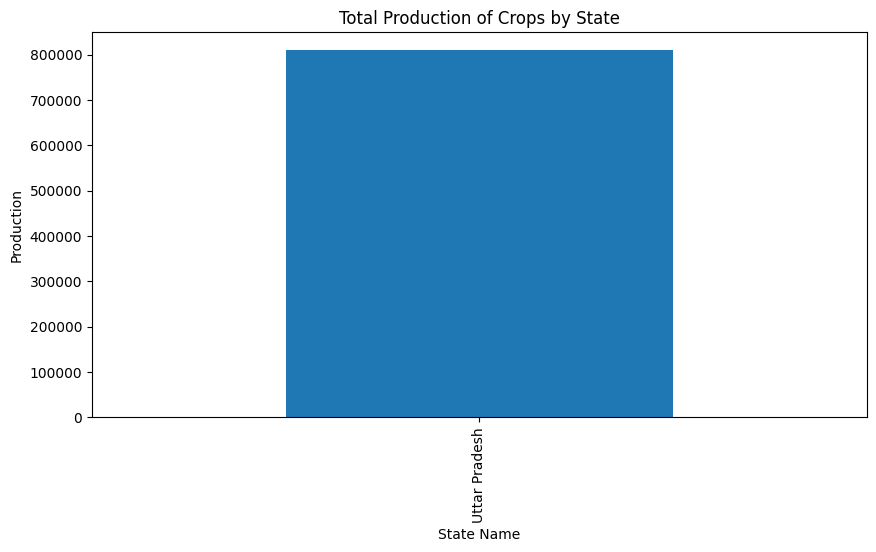

In [151]:
# create barchart x=state_name , y= production

crop_data.groupby('State_Name')['Production'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.xlabel("State Name")
plt.ylabel("Production")
plt.title("Total Production of Crops by State")
plt.show()


([0], [Text(0, 0, 'Uttar Pradesh')])

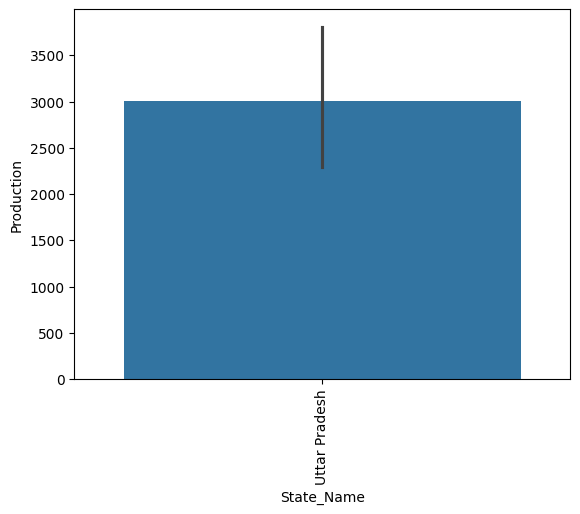

In [152]:
sns.barplot(x="State_Name", y="Production", data=crop_data)
plt.xticks(rotation=90)

([0], [Text(0, 0, 'Uttar Pradesh')])

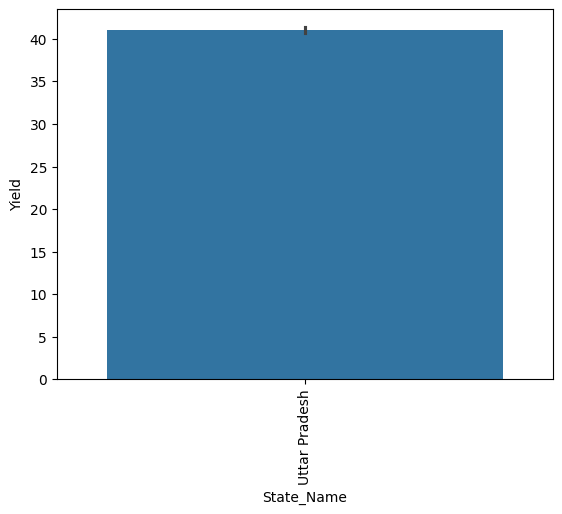

In [153]:
sns.barplot(x="State_Name", y="Yield", data=crop_data)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, '2004'),
  Text(1, 0, '2005'),
  Text(2, 0, '2006'),
  Text(3, 0, '2008'),
  Text(4, 0, '2009'),
  Text(5, 0, '2011'),
  Text(6, 0, '2012'),
  Text(7, 0, '2013'),
  Text(8, 0, '2014')])

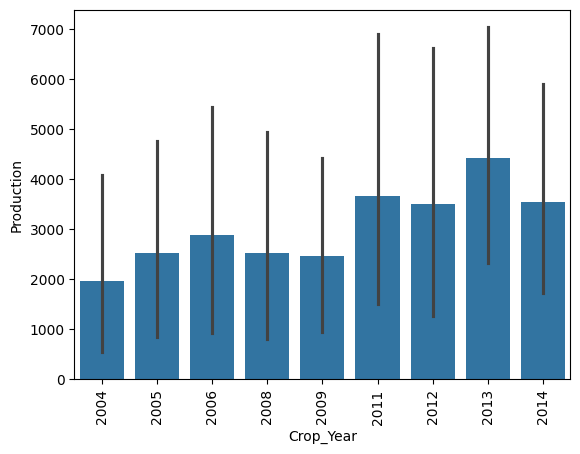

In [154]:
# sns.barplot(x="Crop_Year", data=crop_data)
# plt.xticks(rotation=90)

sns.barplot(x="Crop_Year", y="Production", data=crop_data)
plt.xticks(rotation=90)


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, '2004'),
  Text(1, 0, '2005'),
  Text(2, 0, '2006'),
  Text(3, 0, '2008'),
  Text(4, 0, '2009'),
  Text(5, 0, '2011'),
  Text(6, 0, '2012'),
  Text(7, 0, '2013'),
  Text(8, 0, '2014')])

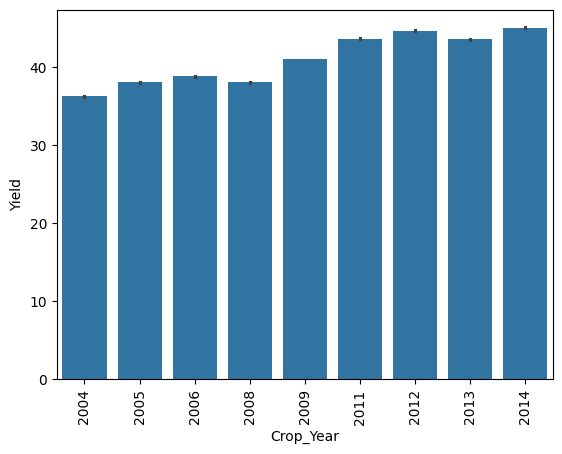

In [155]:
# create bar chart x=crop year , y= yield

sns.barplot(x="Crop_Year", y="Yield", data=crop_data)
plt.xticks(rotation=90)


([0, 1], [Text(0, 0, 'Whole Year '), Text(1, 0, 'Summer     ')])

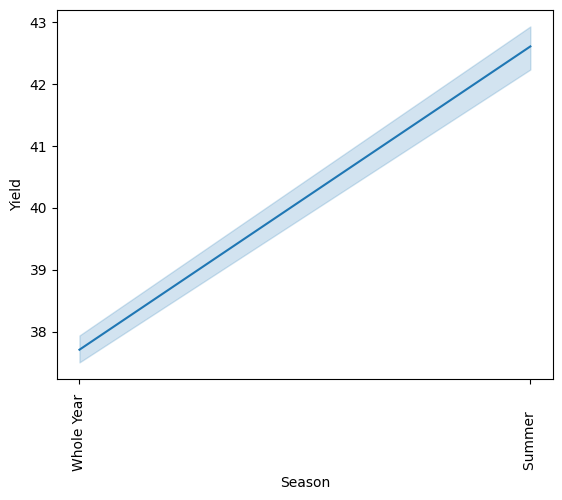

In [156]:
# create lineplot between season and yeild

sns.lineplot(x="Season", y="Yield", data=crop_data)
plt.xticks(rotation=90)


([0, 1], [Text(0, 0, 'Whole Year '), Text(1, 0, 'Summer     ')])

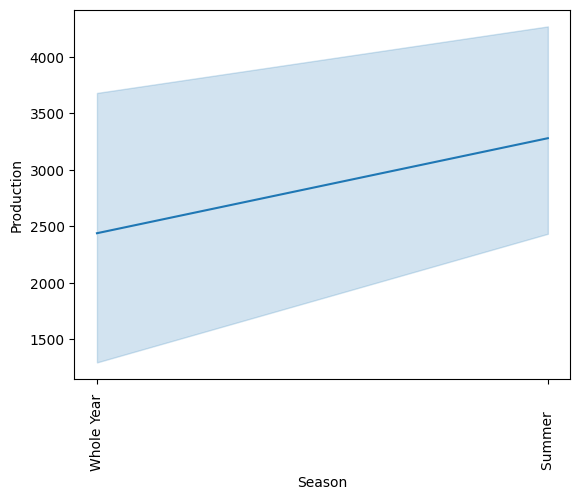

In [157]:
sns.lineplot(data=crop_data, x="Season", y="Production")
plt.xticks(rotation=90)


([0], [Text(0, 0, 'Banana')])

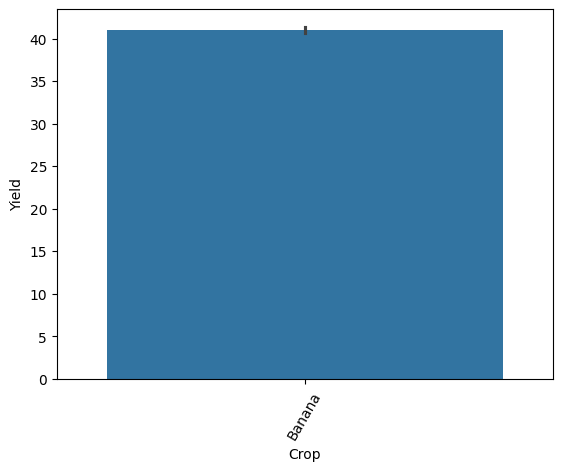

In [158]:
# prompt: sns.barplot(crop_data["Crop"], crop_data["Yield"])
# plt.xticks(rotation = 60)

sns.barplot(x = crop_data["Crop"], y = crop_data["Yield"])
plt.xticks(rotation = 60)


(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,
         800.,  900.]),
 [Text(-100.0, 0, '−100'),
  Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600'),
  Text(700.0, 0, '700'),
  Text(800.0, 0, '800'),
  Text(900.0, 0, '900')])

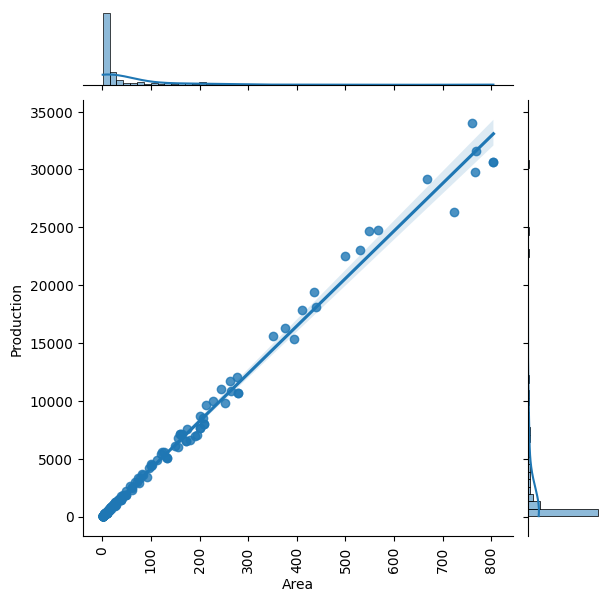

In [159]:
sns.jointplot(x="Area", y="Production", data=crop_data, kind="reg")
plt.xticks(rotation=90)

In [160]:
Banana_data = crop_data[crop_data["Crop"]=="Banana"]
Banana_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Fertilizer,Pesticide,tempmax,tempmin,humidity,precip,windspeed,solarradiation,solarenergy,uvindex,Production,Yield
0,Uttar Pradesh,ALIGARH,2005,Whole Year,Banana,2,255675.42,440.44,0.0,0.0,71.1,0.0,3.6,138.6,12.0,6.0,77,38.500000
1,Uttar Pradesh,ALIGARH,2008,Summer,Banana,2,284792.64,179.19,0.0,0.0,71.1,0.0,3.6,138.6,12.0,6.0,77,38.500000
2,Uttar Pradesh,ALIGARH,2009,Summer,Banana,1,363995.52,397.12,0.0,0.0,71.1,0.0,3.6,138.6,12.0,6.0,41,41.000000
3,Uttar Pradesh,ALIGARH,2012,Summer,Banana,1,364356.00,717.75,20.9,11.9,76.3,24.4,16.9,146.5,12.7,6.0,45,45.000000
4,Uttar Pradesh,ALIGARH,2013,Summer,Banana,1,355737.20,731.29,19.1,3.1,46.9,0.0,12.6,162.5,14.1,6.0,44,44.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Uttar Pradesh,SULTANPUR,2014,Summer,Banana,11,174969.10,179.19,23.4,11.7,73.4,0.0,18.0,132.6,11.3,5.0,496,45.090909
265,Uttar Pradesh,UNNAO,2004,Whole Year,Banana,1,174969.10,179.19,14.1,8.1,83.8,0.0,5.4,138.6,12.0,6.0,36,36.000000
266,Uttar Pradesh,UNNAO,2006,Whole Year,Banana,1,174969.10,179.19,28.1,10.1,69.3,0.0,7.6,138.6,12.0,6.0,39,39.000000
267,Uttar Pradesh,UNNAO,2013,Summer,Banana,17,174969.10,179.19,20.1,7.0,63.1,0.0,9.4,136.3,11.8,5.0,740,43.529412


In [161]:
Banana_data.shape

(269, 18)

([0, 1], [Text(0, 0, 'Whole Year '), Text(1, 0, 'Summer     ')])

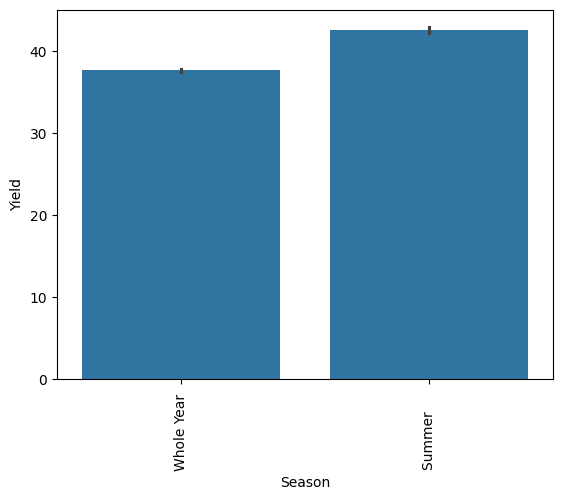

In [162]:
sns.barplot(x="Season", y="Yield", data=Banana_data)
plt.xticks(rotation=90)

([0], [Text(0, 0, 'Uttar Pradesh')])

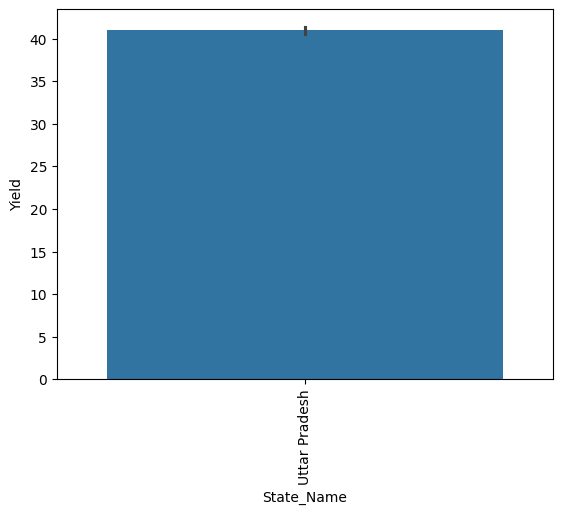

In [163]:
sns.barplot(x="State_Name",y="Yield",data=Banana_data)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, '2004'),
  Text(1, 0, '2005'),
  Text(2, 0, '2006'),
  Text(3, 0, '2008'),
  Text(4, 0, '2009'),
  Text(5, 0, '2011'),
  Text(6, 0, '2012'),
  Text(7, 0, '2013'),
  Text(8, 0, '2014')])

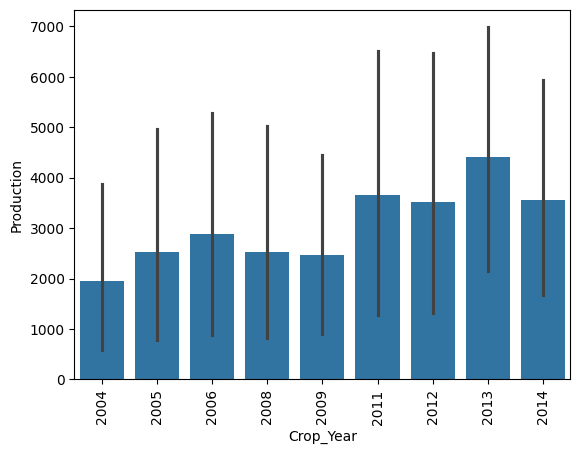

In [164]:
sns.barplot(x="Crop_Year",y="Production",data=Banana_data)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, '2004'),
  Text(1, 0, '2005'),
  Text(2, 0, '2006'),
  Text(3, 0, '2008'),
  Text(4, 0, '2009'),
  Text(5, 0, '2011'),
  Text(6, 0, '2012'),
  Text(7, 0, '2013'),
  Text(8, 0, '2014')])

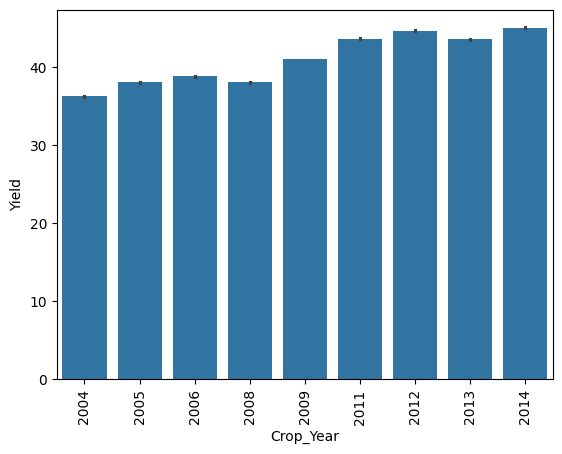

In [165]:
sns.barplot(x="Crop_Year",y="Yield",data=Banana_data)
plt.xticks(rotation=90)

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,
         800.,  900.]),
 [Text(-100.0, 0, '−100'),
  Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600'),
  Text(700.0, 0, '700'),
  Text(800.0, 0, '800'),
  Text(900.0, 0, '900')])

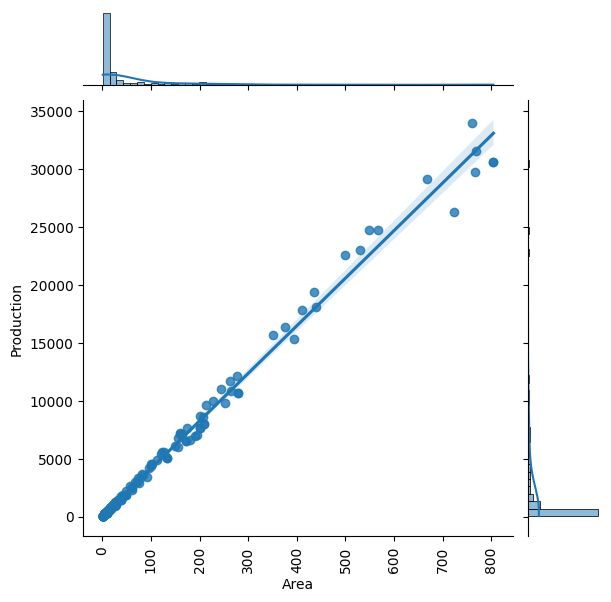

In [166]:
sns.jointplot(x="Area",y="Production",data=Banana_data,kind="reg")
plt.xticks(rotation=90)

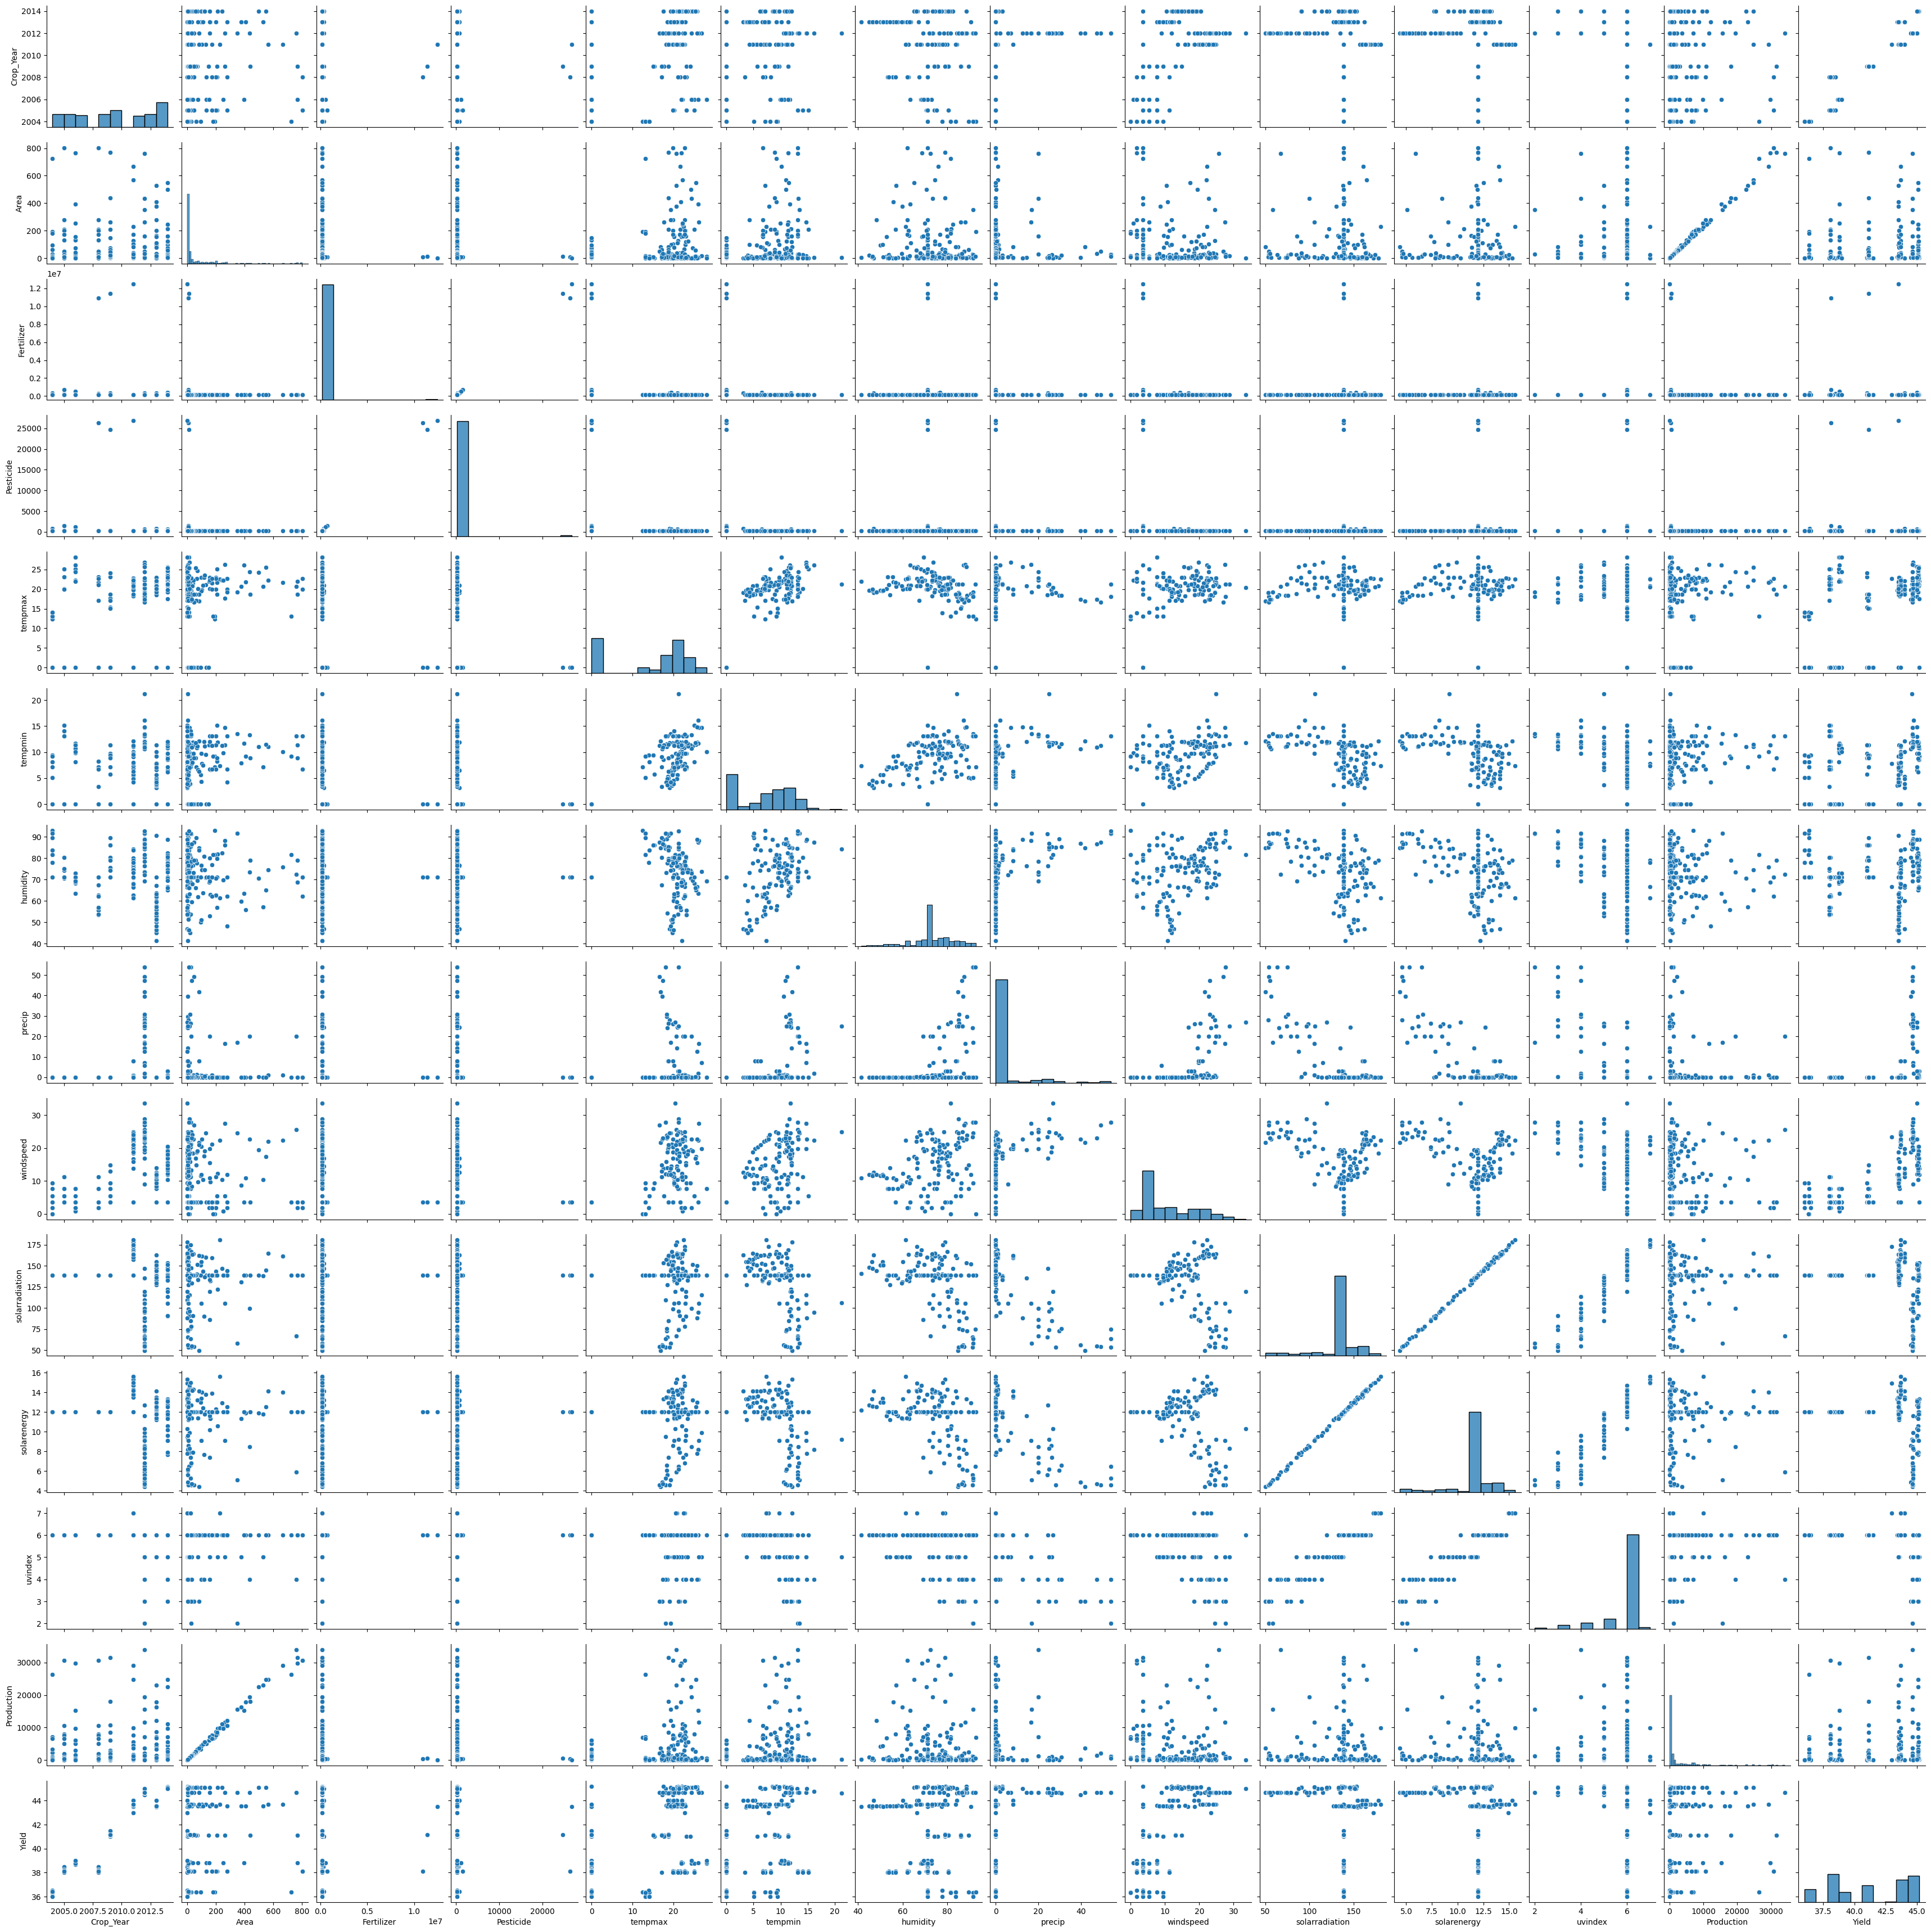

In [167]:
# Visualizing the features
ax = sns.pairplot(crop_data)
ax

(array([0., 1., 2., 3., 4., 5., 6., 7.]),
 [Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7')])

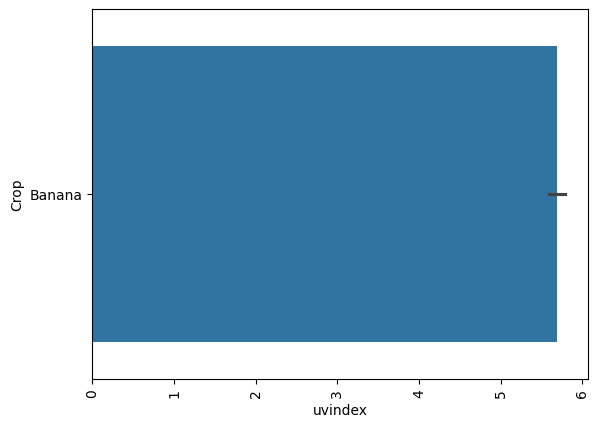

In [168]:
sns.barplot(x="uvindex", y="Crop", data=crop_data)
plt.xticks(rotation=90)

([0], [Text(0, 0, 'Banana')])

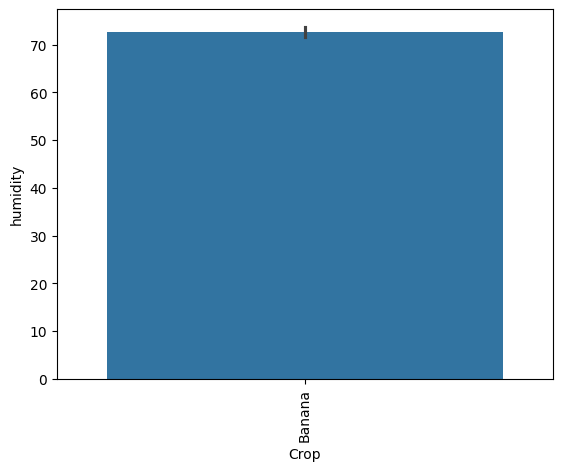

In [169]:
sns.barplot(x="Crop", y="humidity",data=crop_data)
plt.xticks(rotation = 90)

Because we have one state and one crop name so we delete it
because we know data set is talking about uttar pradesh state and banana crop so its value in data set is same
that is why we drop it


In [170]:
#  drop column statename

crop_data.drop('State_Name', axis=1, inplace=True)
crop_data


,District_Name,Crop_Year,Season,Crop,Area,Fertilizer,Pesticide,tempmax,tempmin,humidity,precip,windspeed,solarradiation,solarenergy,uvindex,Production,Yield
0,ALIGARH,2005,Whole Year,Banana,2,255675.42,440.44,0.0,0.0,71.1,0.0,3.6,138.6,12.0,6.0,77,38.500000
1,ALIGARH,2008,Summer,Banana,2,284792.64,179.19,0.0,0.0,71.1,0.0,3.6,138.6,12.0,6.0,77,38.500000
2,ALIGARH,2009,Summer,Banana,1,363995.52,397.12,0.0,0.0,71.1,0.0,3.6,138.6,12.0,6.0,41,41.000000
3,ALIGARH,2012,Summer,Banana,1,364356.00,717.75,20.9,11.9,76.3,24.4,16.9,146.5,12.7,6.0,45,45.000000
4,ALIGARH,2013,Summer,Banana,1,355737.20,731.29,19.1,3.1,46.9,0.0,12.6,162.5,14.1,6.0,44,44.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,SULTANPUR,2014,Summer,Banana,11,174969.10,179.19,23.4,11.7,73.4,0.0,18.0,132.6,11.3,5.0,496,45.090909
265,UNNAO,2004,Whole Year,Banana,1,174969.10,179.19,14.1,8.1,83.8,0.0,5.4,138.6,12.0,6.0,36,36.000000
266,UNNAO,2006,Whole Year,Banana,1,174969.10,179.19,28.1,10.1,69.3,0.0,7.6,138.6,12.0,6.0,39,39.000000
267,UNNAO,2013,Summer,Banana,17,174969.10,179.19,20.1,7.0,63.1,0.0,9.4,136.3,11.8,5.0,740,43.529412


In [171]:
# prompt: Using dataframe crop_data: drop the column crop

crop_data.drop('Crop', axis=1, inplace=True)


In [172]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   District_Name   269 non-null    object 
 1   Crop_Year       269 non-null    int64  
 2   Season          269 non-null    object 
 3   Area            269 non-null    int64  
 4   Fertilizer      269 non-null    float64
 5   Pesticide       269 non-null    float64
 6   tempmax         269 non-null    float64
 7   tempmin         269 non-null    float64
 8   humidity        269 non-null    float64
 9   precip          269 non-null    float64
 10  windspeed       269 non-null    float64
 11  solarradiation  269 non-null    float64
 12  solarenergy     269 non-null    float64
 13  uvindex         269 non-null    float64
 14  Production      269 non-null    int64  
 15  Yield           269 non-null    float64
dtypes: float64(11), int64(3), object(2)
memory usage: 33.8+ KB


In [173]:
# Use label encoding to convert categorical variables to integers
label_mapping_district = {district: idx for idx, district in enumerate(crop_data['District_Name'].unique())}
label_mapping_season = {season: idx for idx, season in enumerate(crop_data['Season'].unique())}

crop_data['District_Name'] = crop_data['District_Name'].map(label_mapping_district)
crop_data['Season'] = crop_data['Season'].map(label_mapping_season)

print(crop_data)

     District_Name  Crop_Year  Season  Area  Fertilizer  Pesticide  tempmax  \
0                0       2005       0     2   255675.42     440.44      0.0   
1                0       2008       1     2   284792.64     179.19      0.0   
2                0       2009       1     1   363995.52     397.12      0.0   
3                0       2012       1     1   364356.00     717.75     20.9   
4                0       2013       1     1   355737.20     731.29     19.1   
..             ...        ...     ...   ...         ...        ...      ...   
264             50       2014       1    11   174969.10     179.19     23.4   
265             51       2004       0     1   174969.10     179.19     14.1   
266             51       2006       0     1   174969.10     179.19     28.1   
267             51       2013       1    17   174969.10     179.19     20.1   
268             51       2014       1     4   174969.10     179.19     23.0   

     tempmin  humidity  precip  windspeed  solarrad

In [174]:
crop_data.corr()


,District_Name,Crop_Year,Season,Area,Fertilizer,Pesticide,tempmax,tempmin,humidity,precip,windspeed,solarradiation,solarenergy,uvindex,Production,Yield
District_Name,1.000000,-0.086566,-0.075763,-0.023374,-0.198388,-0.200270,0.087290,0.091477,0.030120,-0.020180,-0.026653,-0.004784,-0.003353,0.017535,-0.023543,-0.091811
Crop_Year,-0.086566,1.000000,0.841388,0.063158,0.008376,0.006833,0.486856,0.355977,-0.063586,0.279539,0.697835,-0.198958,-0.205538,-0.403101,0.096814,0.954934
Season,-0.075763,0.841388,1.000000,0.037447,0.070098,0.069087,0.321368,0.185648,-0.068840,0.223291,0.520597,-0.123812,-0.128404,-0.264338,0.062949,0.737374
Area,-0.023374,0.063158,0.037447,1.000000,-0.048069,-0.048502,0.237533,0.242013,-0.066205,-0.015018,0.036814,-0.024663,-0.024843,-0.046514,0.996687,0.061295
Fertilizer,-0.198388,0.008376,0.070098,-0.048069,1.000000,0.998492,-0.160931,-0.147500,-0.019267,-0.034851,-0.087224,0.021367,0.022115,0.043021,-0.048417,-0.000675
Pesticide,-0.200270,0.006833,0.069087,-0.048502,0.998492,1.000000,-0.161594,-0.148324,-0.019812,-0.034807,-0.087462,0.021887,0.022645,0.043430,-0.048866,-0.004056
tempmax,0.087290,0.486856,0.321368,0.237533,-0.160931,-0.161594,1.000000,0.886846,-0.002696,0.177160,0.551266,-0.100476,-0.104612,-0.245633,0.247998,0.493318
tempmin,0.091477,0.355977,0.185648,0.242013,-0.147500,-0.148324,0.886846,1.000000,0.297950,0.353171,0.551315,-0.324416,-0.325989,-0.388101,0.250262,0.428504
humidity,0.030120,-0.063586,-0.068840,-0.066205,-0.019267,-0.019812,-0.002696,0.297950,1.000000,0.421503,0.271014,-0.412792,-0.414742,-0.335212,-0.066706,0.079274
precip,-0.020180,0.279539,0.223291,-0.015018,-0.034851,-0.034807,0.177160,0.353171,0.421503,1.000000,0.587018,-0.784736,-0.788280,-0.711867,-0.004216,0.377067


Text(0.5, 1.0, 'Correlation Matrix')

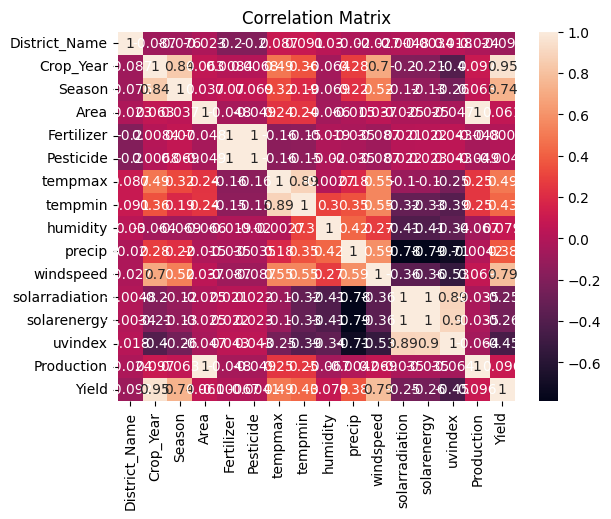

In [175]:
sns.heatmap(crop_data.corr(), annot =True)
plt.title('Correlation Matrix')

In [177]:
dummy = pd.get_dummies(crop_data)
dummy

,District_Name,Crop_Year,Season,Area,Fertilizer,Pesticide,tempmax,tempmin,humidity,precip,windspeed,solarradiation,solarenergy,uvindex,Production,Yield
0,0,2005,0,2,255675.42,440.44,0.0,0.0,71.1,0.0,3.6,138.6,12.0,6.0,77,38.500000
1,0,2008,1,2,284792.64,179.19,0.0,0.0,71.1,0.0,3.6,138.6,12.0,6.0,77,38.500000
2,0,2009,1,1,363995.52,397.12,0.0,0.0,71.1,0.0,3.6,138.6,12.0,6.0,41,41.000000
3,0,2012,1,1,364356.00,717.75,20.9,11.9,76.3,24.4,16.9,146.5,12.7,6.0,45,45.000000
4,0,2013,1,1,355737.20,731.29,19.1,3.1,46.9,0.0,12.6,162.5,14.1,6.0,44,44.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,50,2014,1,11,174969.10,179.19,23.4,11.7,73.4,0.0,18.0,132.6,11.3,5.0,496,45.090909
265,51,2004,0,1,174969.10,179.19,14.1,8.1,83.8,0.0,5.4,138.6,12.0,6.0,36,36.000000
266,51,2006,0,1,174969.10,179.19,28.1,10.1,69.3,0.0,7.6,138.6,12.0,6.0,39,39.000000
267,51,2013,1,17,174969.10,179.19,20.1,7.0,63.1,0.0,9.4,136.3,11.8,5.0,740,43.529412


In [178]:
from sklearn.model_selection import train_test_split

x = dummy.drop(["Production","Yield"], axis=1)
y = dummy["Production"]

# Splitting data set - 25% test dataset and 75%

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=5)

print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (201, 14)
x_test : (68, 14)
y_train : (201,)
y_test : (68,)


In [179]:
print(x_train)
print(y_train)

     District_Name  Crop_Year  Season  Area  Fertilizer  Pesticide  tempmax  \
40               8       2013       1     5    174969.1     179.19     21.4   
198             39       2008       1     3    174969.1     179.19      0.0   
51              12       2005       0     7    174969.1     179.19     19.9   
79              17       2014       1    16    174969.1     179.19     21.5   
114             26       2004       0     3    174969.1     179.19     13.1   
..             ...        ...     ...   ...         ...        ...      ...   
8                1       2006       0    10    517372.0    1181.60      0.0   
73              17       2004       0     1    174969.1     179.19      0.0   
118             26       2009       1     1    174969.1     179.19     24.1   
189             38       2005       0     7    174969.1     179.19      0.0   
206             40       2012       1    18    174969.1     179.19     21.2   

     tempmin  humidity  precip  windspeed  solarrad

# Linear regression

In [180]:
# Training the Simple Linear Regression model .

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [181]:
# Predicting the test Results

lr_predict = model.predict(x_test)
lr_predict

array([ 1.80308399e+04, -1.33990771e+01,  6.78716703e+03,  5.47461866e+03,
        3.14937722e+02,  1.83043371e+04,  2.31058134e+02,  1.01699088e+03,
       -5.94752818e+01,  3.89786803e+02,  1.28060760e+01,  1.06538412e+03,
        6.88562441e+03, -1.12858127e+02,  3.11742536e+02,  1.96605544e+03,
        4.35918940e+03,  4.81711993e+03,  9.45782542e+01,  3.16756490e+04,
        2.02954997e+03,  5.45040651e+03,  8.50454418e+03, -2.36302315e+02,
        7.62274640e+03,  1.12046885e+02,  1.62970911e+02, -7.67341091e+01,
        1.68346854e+02,  1.55145348e+03,  6.95375963e+03,  6.68629165e+03,
        2.90738788e+02,  6.23797386e+02, -1.95779329e+01,  4.41457735e+02,
        5.63504752e+02,  7.26985550e+02,  3.31698884e+04, -1.28293327e+02,
        7.97768369e+03, -5.00284812e+01,  5.07367765e+02,  5.61226134e+03,
        2.70688326e+02,  1.12278281e+02,  5.43649281e+03, -2.81418890e+02,
        3.15833897e+04,  1.11950680e+03,  5.72068528e+02,  2.83288205e+02,
        7.41806653e+03,  

In [182]:
model.score(x_test,y_test)

0.9957794821885907

In [183]:
from sklearn.metrics import r2_score
r = r2_score(y_test,lr_predict)
print("R2 score : ",r)

R2 score :  0.9957794821885907


Text(0.5, 1.0, 'Linear Regression')

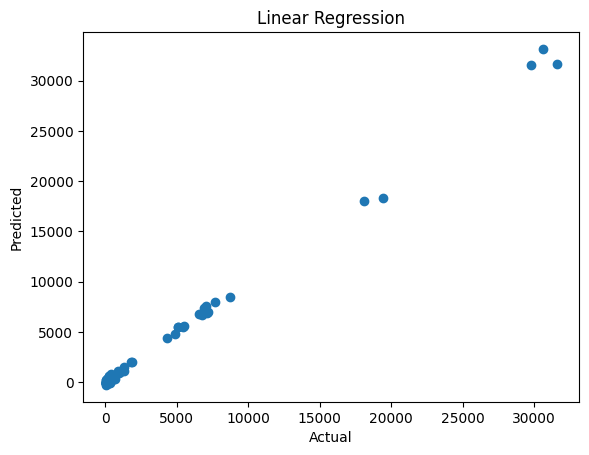

In [184]:
plt.scatter(y_test,lr_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')

#Random Forest Algorithm

In [185]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 11)
model.fit(x_train,y_train)
rf_predict = model.predict(x_test)
rf_predict

array([21095.36363636,   113.27272727,  6883.45454545,  5206.90909091,
         130.81818182, 18408.18181818,   553.09090909,  1214.54545455,
         325.54545455,   380.        ,    76.45454545,   837.18181818,
        6687.63636364,   116.81818182,   804.81818182,  1948.27272727,
        4538.09090909,  4462.90909091,   171.27272727, 28808.27272727,
        1698.90909091,  4884.        ,  8377.63636364,   161.45454545,
        7522.72727273,   274.36363636,    44.27272727,    41.        ,
          43.45454545,  1171.18181818,  6563.54545455,  6591.63636364,
         358.36363636,   610.81818182,    38.27272727,   389.90909091,
         285.27272727,   401.63636364, 29943.72727273,    44.81818182,
        8171.45454545,    38.45454545,   552.36363636,  5205.90909091,
         317.54545455,   165.09090909,  4935.63636364,    75.63636364,
       29199.63636364,  1214.54545455,   288.09090909,   196.72727273,
        7245.81818182,  1099.        ,   122.09090909,    44.        ,
      

In [186]:
model.score(x_test,y_test)

0.993769858412059

In [187]:
# Calculating R2 score

from sklearn.metrics import r2_score
r1 = r2_score(y_test,rf_predict)
print("R2 score : ",r1)

R2 score :  0.993769858412059


In [188]:
# Calculating Adj. R2 score:

Adjr2_1 = 1 - (1-r)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_1))

Adj. R-Squared : 0.9946646284270864


<ipython-input-189-536534997cd4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
<ipython-input-189-536534997cd4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rf_predict, hist = False, color = "b", label = "P

Text(0.5, 1.0, 'Random Forest Regression')

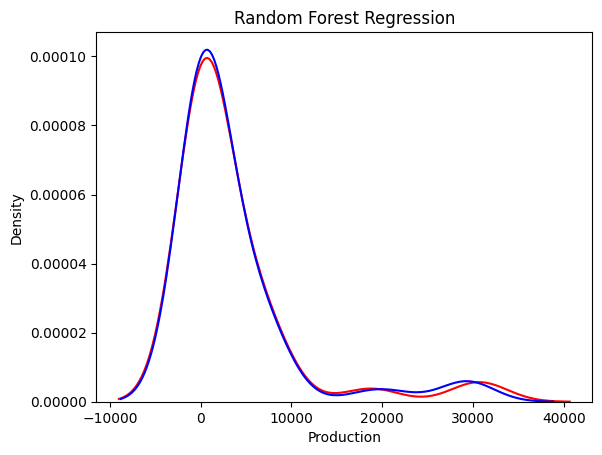

In [189]:
ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
sns.distplot(rf_predict, hist = False, color = "b", label = "Predicted Values", ax = ax)
plt.title('Random Forest Regression')

#Comparison between Linear Regression Algorithm and Random Forest Algorithm

Linear regression algorithm is all accurate for this kind of prediction.

Linear regression Algorithm has higher accuracy ( between 99.57 % to 99.37% ).

#Decision Tree

In [198]:
# Training model
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 5)
regressor.fit(x_train,y_train)

# Predicting results
decisiontree_predict = regressor.predict(x_test)
decisiontree_predict

array([16328.,    39.,  5592.,  4180.,    45., 16328.,   291.,   905.,
         182.,   246.,    38.,   632.,  5592.,    38.,   496.,  1521.,
        4180.,  4180.,    45., 29141.,  1529.,  4500.,  7602.,    38.,
        6016.,   114.,    45.,    41.,    43.,  1116.,  5592.,  5592.,
         246.,   381.,    38.,   182.,   123.,   206., 26331.,    45.,
        7602.,    39.,   349.,  4500.,   155.,    41.,  4500.,    38.,
       26331.,   905.,   123.,    87.,  6016.,   786.,    41.,    45.,
          41.,    38.,    41.,   182.,   381.,    41.,    43.,   114.,
          41.,  1072.,   271.,   123.])

In [199]:
regressor.score(x_test,y_test)

0.9804888978245844

In [200]:
# Calculating R2 score :

from sklearn.metrics import r2_score
r2 = r2_score(y_test,decisiontree_predict)
print("R2 score : ",r2)

R2 score :  0.9804888978245844


In [201]:
# Calculating Adj. R2 score:

Adjr2_2 = 1 - (1-r)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_2))

Adj. R-Squared : 0.9946646284270864


<ipython-input-202-514925a0f08b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
<ipython-input-202-514925a0f08b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(decisiontree_predict, hist = False, color = "b", 

Text(0.5, 1.0, 'Decision Tree Regression')

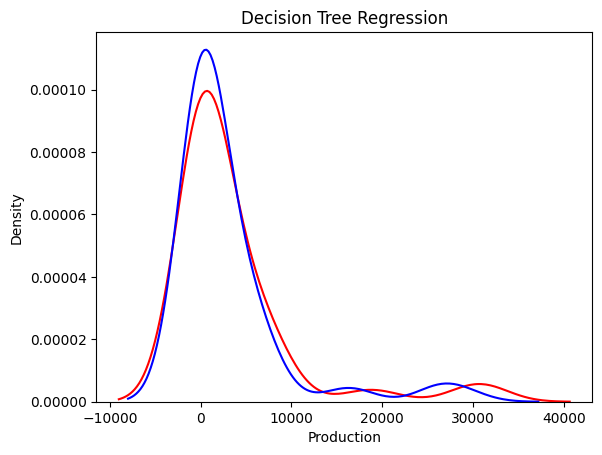

In [202]:
ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
sns.distplot(decisiontree_predict, hist = False, color = "b", label = "Predicted Values", ax = ax)
plt.title('Decision Tree Regression')

#CrossValidation

In [204]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = x_train, y=y_train, cv = 10)
a1 = (accuracies.mean()*100)
b1 = (accuracies.std()*100)
# Mean Accuracy and SD of 10 fold results

print("Accuracy : {:.2f}%".format (accuracies.mean()*100))
print("Standard Deviation : {:.2f}%".format(accuracies.std()*100))

Accuracy : 98.10%
Standard Deviation : 1.85%


#CrossValidation

In [208]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = x_train, y=y_train)
a2 = (accuracies.mean()*100)
b2 = (accuracies.std()*100)
print("Accuracy : {:.2f}%".format (accuracies.mean()*100))
print("Standard Deviation : {:.2f}%".format(accuracies.std()*100))

Accuracy : 97.73%
Standard Deviation : 1.08%


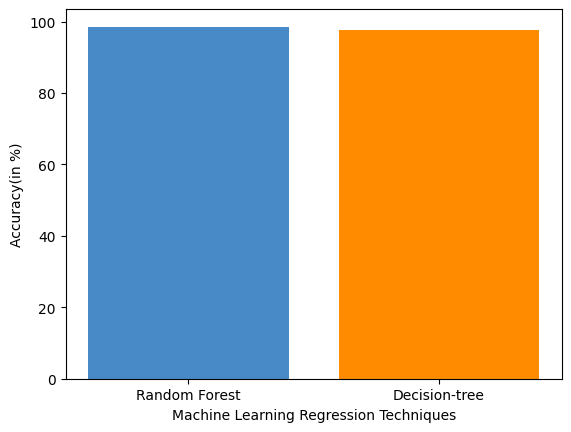

In [209]:
import numpy as np
import matplotlib.pyplot as plt

# create a dataset
Algorithms = ['Random Forest', 'Decision-tree']
Accuracy = [a1, a2]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['#488AC7','#ff8c00'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('Accuracy(in %)')
plt.xlabel('Machine Learning Regression Techniques')

# Show graph
plt.show()

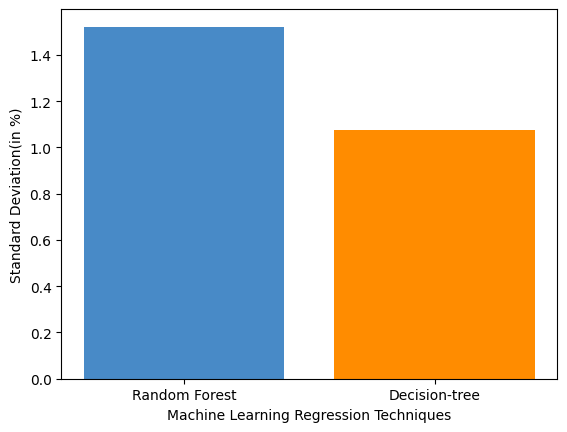

In [210]:
import numpy as np
import matplotlib.pyplot as plt

# create a dataset
Algorithms = ['Random Forest', 'Decision-tree']
Accuracy = [b1, b2]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['#488AC7','#ff8c00'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('Standard Deviation(in %)')
plt.xlabel('Machine Learning Regression Techniques')

# Show graph
plt.show()

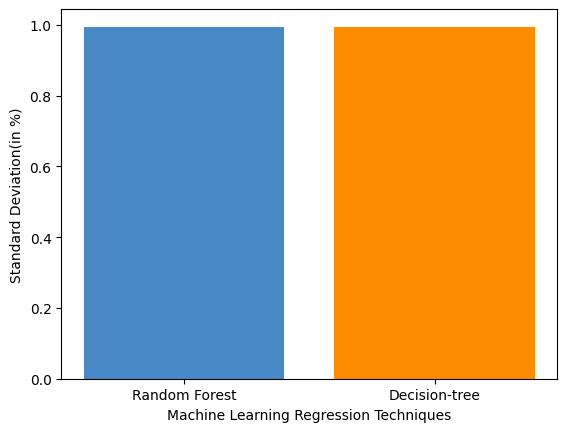

In [211]:
import numpy as np
import matplotlib.pyplot as plt

# create a dataset
Algorithms = ['Random Forest', 'Decision-tree']
Accuracy = [Adjr2_1, Adjr2_2]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['#488AC7','#ff8c00'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('Standard Deviation(in %)')
plt.xlabel('Machine Learning Regression Techniques')

# Show graph
plt.show()

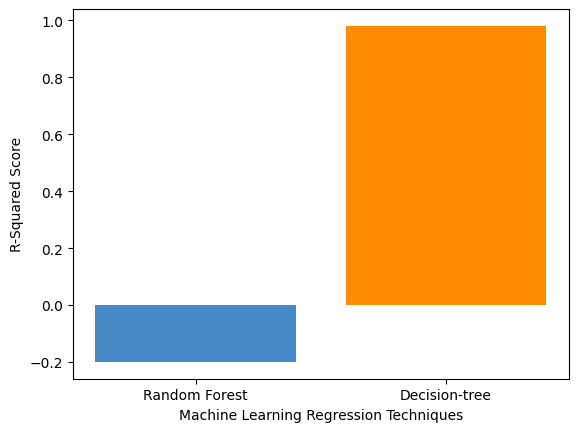

In [212]:
import numpy as np
import matplotlib.pyplot as plt

# create a dataset
Algorithms = ['Random Forest', 'Decision-tree']
Accuracy = [r1, r2]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['#488AC7','#ff8c00'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('R-Squared Score')
plt.xlabel('Machine Learning Regression Techniques')

# Show graph
plt.show()

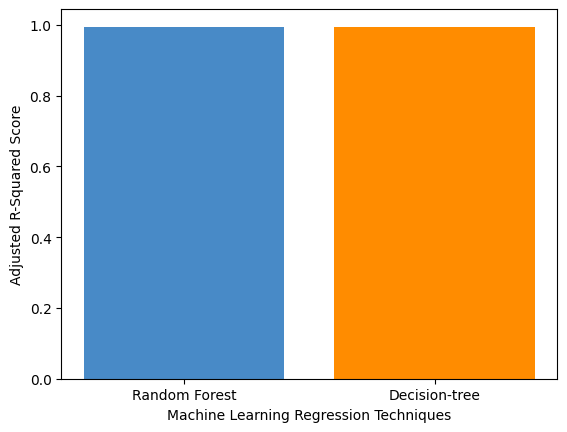

In [213]:
import numpy as np
import matplotlib.pyplot as plt

# create a dataset
Algorithms = ['Random Forest', 'Decision-tree']
Accuracy = [Adjr2_1, Adjr2_2]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['#488AC7','#ff8c00'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('Adjusted R-Squared Score')
plt.xlabel('Machine Learning Regression Techniques')

# Show graph
plt.show()

In [215]:
!pip install scikit-learn

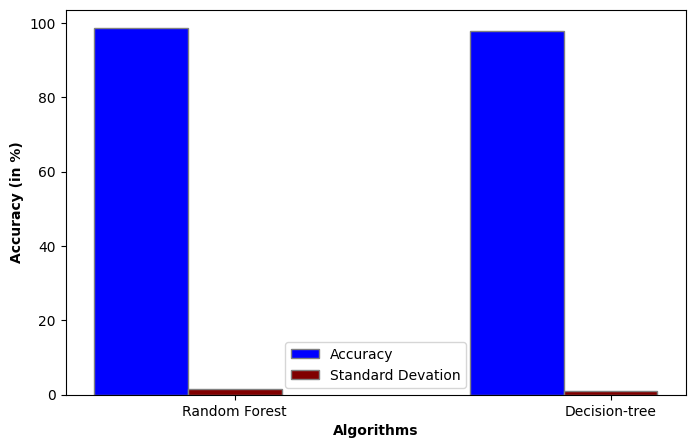

In [219]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(8, 5))

# set height of bar
Algorithms = ['Random Forest', 'Decision-tree']
Accuracy = [a1, a2]
Standard_Deviation = [b1,b2]

# Set position of bar on X axis
br1 = np.arange(len(Accuracy))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, Accuracy, color ='blue', width = barWidth,
        edgecolor ='grey', label ='Accuracy')
plt.bar(br2, Standard_Deviation, color ='maroon', width = barWidth,
        edgecolor ='grey', label ='Standard Devation')

# Adding Xticks
plt.xlabel('Algorithms', fontweight ='bold', fontsize = 10)
plt.ylabel('Accuracy (in %)', fontweight ='bold', fontsize = 10)
plt.xticks([r + barWidth for r in range(len(Accuracy))],
        Algorithms)

plt.legend()
plt.show()


#Hyperparameter Tuning using GridSearchCV

DecisionTreeRegressor

In [221]:
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': ['sqrt', 'log2', None]
}

In [222]:
reg = GridSearchCV(DecisionTreeRegressor(), param_grid, refit = True, verbose = 3,n_jobs=-1)
reg.fit(x_train,y_train)

Fitting 5 folds for each of 23760 candidates, totalling 118800 fits


GridSearchCV(estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']},
             verbose=3)

In [223]:
print(reg.best_score_)
print(reg.best_params_)

0.9862102082492138
{'criterion': 'poisson', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'random'}
